# CSV

In [1]:
import pandas as pd


# Charger les fichiers CSV
accel_df = pd.read_csv('accelerometer.csv', sep=',')
orient_df = pd.read_csv('orientation.csv', sep=',')
location_df = pd.read_csv('location.csv', sep=',')

# Afficher les DataFrames chargés
print("Accelerometer DataFrame:")
print(accel_df.head())

print("\nOrientation DataFrame:")
print(orient_df.head())

print("\nLocation DataFrame:")
print(location_df.head())

# Fusionner les données des trois CSV selon le temps
merged_df = pd.merge_asof(accel_df.sort_values('time'), orient_df.sort_values('time'), on='time', direction='nearest')
merged_df = pd.merge_asof(merged_df.sort_values('time'), location_df.sort_values('time'), on='time', direction='nearest')

merged_df.head()


Accelerometer DataFrame:
                  time  seconds_elapsed         z         y         x
0  1728905892151481300         0.124481  3.031113  1.739928 -2.738261
1  1728905892161481200         0.134481  2.543669  2.172559 -2.676702
2  1728905892171481300         0.144481  0.708398  1.350286 -2.833233
3  1728905892181481200         0.154481 -0.942148  0.140309 -2.983238
4  1728905892191481300         0.164481 -2.296083 -0.994283 -3.362856

Orientation DataFrame:
                  time  seconds_elapsed        qz        qy        qx  \
0  1728905892151481300         0.124481  0.405595  0.021519  0.182252   
1  1728905892161481200         0.134481  0.408554  0.012109  0.184250   
2  1728905892171481300         0.144481  0.413500  0.005160  0.188648   
3  1728905892181481200         0.154481  0.419639  0.000997  0.195267   
4  1728905892191481300         0.164481  0.426294 -0.001826  0.204571   

         qw      roll     pitch       yaw  
0  0.895440 -0.116665 -0.351011 -0.871329  
1  0

,time,seconds_elapsed_x,z,y,x,seconds_elapsed_y,qz,qy,qx,qw,...,seconds_elapsed,bearingAccuracy,speedAccuracy,verticalAccuracy,horizontalAccuracy,speed,bearing,altitude,longitude,latitude
0,1728905892151481300,0.124481,3.031113,1.739928,-2.738261,0.124481,0.405595,0.021519,0.182252,0.895440,...,1.439,45.0,1.5,1.099718,17.941,0.0,0.0,74.099998,-0.607808,44.79805
1,1728905892161481200,0.134481,2.543669,2.172559,-2.676702,0.134481,0.408554,0.012109,0.184250,0.893861,...,1.439,45.0,1.5,1.099718,17.941,0.0,0.0,74.099998,-0.607808,44.79805
2,1728905892171481300,0.144481,0.708398,1.350286,-2.833233,0.144481,0.413500,0.005160,0.188648,0.890731,...,1.439,45.0,1.5,1.099718,17.941,0.0,0.0,74.099998,-0.607808,44.79805
3,1728905892181481200,0.154481,-0.942148,0.140309,-2.983238,0.154481,0.419639,0.000997,0.195267,0.886437,...,1.439,45.0,1.5,1.099718,17.941,0.0,0.0,74.099998,-0.607808,44.79805
4,1728905892191481300,0.164481,-2.296083,-0.994283,-3.362856,0.164481,0.426294,-0.001826,0.204571,0.881146,...,1.439,45.0,1.5,1.099718,17.941,0.0,0.0,74.099998,-0.607808,44.79805


# JSON

In [7]:
import pandas as pd
import json

# Load the JSON file
with open('Avenue_de_Collegno-2024-10-18_14-32-58.json') as file:
    data = json.load(file)

# Convert to main DataFrame
df = pd.DataFrame(data)

# Create DataFrames for each sensor by selecting relevant columns
accel_df = df[df['sensor'] == 'Accelerometer'][['time', 'x', 'y', 'z']].astype(float)
orient_df = df[df['sensor'] == 'Orientation'][['time', 'qx', 'qy', 'qz', 'qw']].astype(float)
location_df = df[df['sensor'] == 'Location'][['time', 'longitude', 'latitude', 'altitude', 'speed']].astype(float)

# Convert 'time' columns to datetime (assuming time is in nanoseconds since epoch)
try:
    accel_df['time'] = pd.to_numeric(accel_df['time'])
    orient_df['time'] = pd.to_numeric(orient_df['time'])
    location_df['time'] = pd.to_numeric(location_df['time'])
except Exception as e:
    print(f"Error converting time: {e}")

# Merge DataFrames using 'time' with the nearest method
merged_df = pd.merge_asof(
    accel_df.sort_values('time'),
    orient_df.sort_values('time'),
    on='time',
    direction='nearest'
)

merged_df = pd.merge_asof(
    merged_df.sort_values('time'),
    location_df.sort_values('time'),
    on='time',
    direction='nearest'
)

merged_df.head()

,time,x,y,z,qx,qy,qz,qw,longitude,latitude,altitude,speed
0,1.729262e+18,-0.003477,0.003132,0.050409,0.289743,0.075100,0.954153,0.000286,-0.605341,44.806653,76.900002,0.0
1,1.729262e+18,-0.015439,0.000207,0.058994,0.290458,0.075252,0.953923,0.000359,-0.605341,44.806653,76.900002,0.0
2,1.729262e+18,-0.022426,-0.007210,0.065023,0.290890,0.075625,0.953762,0.000477,-0.605341,44.806653,76.900002,0.0
3,1.729262e+18,-5.659175,0.780330,1.060677,0.290955,0.076068,0.953707,0.000744,-0.605341,44.806653,76.900002,0.0
4,1.729262e+18,-5.714605,0.741050,0.985343,0.290747,0.076489,0.953736,0.001206,-0.605341,44.806653,76.900002,0.0


# Compute

In [2]:
import numpy as np
from scipy.spatial.transform import Rotation as R
import folium
import matplotlib.pyplot as plt
import matplotlib
from geopy.distance import geodesic

/tmp/ipykernel_37965/3988655225.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('RdYlGn_r')  # Gradient de rouge à vert (inversé pour que le rouge soit les chocs forts)


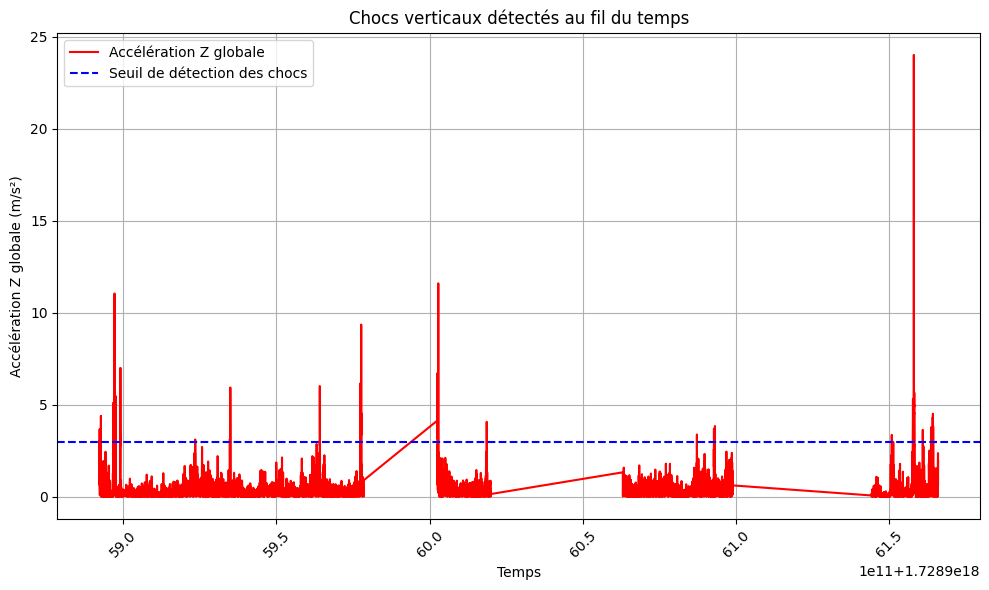

In [ ]:
# Fonction pour convertir les quaternions en rotations
def quaternion_to_rotation_matrix(qw, qx, qy, qz):
    return R.from_quat([qx, qy, qz, qw])

# Appliquer la rotation pour obtenir l'accélération dans le repère global
def rotate_acceleration(accel_x, accel_y, accel_z, rotation):
    accel_local = np.array([accel_x, accel_y, accel_z])
    accel_global = rotation.apply(accel_local)
    return accel_global

# Créer une liste pour stocker les résultats
results = []


# Paramètre pour détecter les chocs verticaux (uniquement sur l'axe Z)
shock_threshold = 3  # seuil de détection des chocs, ajustable

# Parcourir chaque ligne fusionnée
times = []  # Pour stocker les temps
z_shocks = []  # Pour stocker les valeurs de l'accélération Z globale

for _, row in merged_df.iterrows():
    # Récupérer les valeurs d'accélération et d'orientation
    accel_z = row['z']  # Se concentrer uniquement sur l'axe Z
    qw, qx, qy, qz = row['qw'], row['qx'], row['qy'], row['qz']
    
    # Obtenir la matrice de rotation à partir des quaternions
    rotation = quaternion_to_rotation_matrix(qw, qx, qy, qz)
     
    # Appliquer la rotation aux coordonnées d'accélération pour l'axe Z uniquement
    accel_global = rotate_acceleration(0, 0, accel_z, rotation)
    
    # Récupérer la composante Z dans le repère global
    z_global = accel_global[2]
    
    # Ajouter la valeur à la liste des temps et des chocs
    times.append(row['time'])
    z_shocks.append(abs(z_global))
    
    # Détecter un choc si la composante Z dépasse un certain seuil
    if abs(z_global) > shock_threshold:
        results.append((row['time'], abs(z_global), row['latitude'], row['longitude']))

# Si des chocs sont détectés, les afficher sur une carte
m = folium.Map(location=[location_df['latitude'].iloc[0], location_df['longitude'].iloc[0]], zoom_start=15)

# Dessiner le trajet sur la carte avec une ligne
trajectory = list(zip(location_df['latitude'], location_df['longitude']))
folium.PolyLine(trajectory, color='blue', weight=2.5, opacity=0.7).add_to(m)

# Fonction pour obtenir la couleur en fonction de la magnitude du choc
def get_color_from_shock(z_value, min_z, max_z):
    norm = matplotlib.colors.Normalize(vmin=min_z, vmax=max_z)
    cmap = matplotlib.cm.get_cmap('RdYlGn_r')  # Gradient de rouge à vert (inversé pour que le rouge soit les chocs forts)
    rgba = cmap(norm(z_value))
    return matplotlib.colors.to_hex(rgba)

# Filtrer les chocs pour éviter les redondances (garder un seul choc par zone de 1 mètre)
def distance_between_coords(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).meters

if results:
    shock_df = pd.DataFrame(results, columns=['time', 'z_global', 'latitude', 'longitude'])
    
    # Trouver les valeurs min et max des chocs pour normaliser les couleurs
    min_z = shock_df['z_global'].min()
    max_z = shock_df['z_global'].max()

    filtered_shocks = []  # Liste pour stocker les chocs non redondants

    # Parcourir les chocs détectés et filtrer ceux trop proches
    for i, row in shock_df.iterrows():
        lat, lon, z_global = row['latitude'], row['longitude'], row['z_global']
        
        too_close = False
        for j, shock in enumerate(filtered_shocks):
            lat2, lon2, z_global2 = shock[2], shock[3], shock[1]
            if distance_between_coords(lat, lon, lat2, lon2) < 1:
                too_close = True
                # Si un choc est déjà proche, on garde celui qui a la plus grande intensité
                if z_global > z_global2:
                    filtered_shocks[j] = (row['time'], z_global, lat, lon)
                break
        
        if not too_close:
            filtered_shocks.append((row['time'], z_global, lat, lon))

    # Ajouter les points de choc filtrés sur la carte avec un gradient de couleurs
    for shock in filtered_shocks:
        time, z_global, lat, lon = shock
        shock_color = get_color_from_shock(z_global, min_z, max_z)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            popup=f"Choc détecté à {time} avec une accélération de {z_global:.2f} m/s²",
            color=shock_color,
            fill=True,
            fill_opacity=0.7
        ).add_to(m)

# Afficher le graphique des chocs Z dans le temps
plt.figure(figsize=(10, 6))
plt.plot(times, z_shocks, color='red', label='Accélération Z globale')
plt.axhline(y=shock_threshold, color='blue', linestyle='--', label='Seuil de détection des chocs')
plt.xlabel('Temps')
plt.ylabel('Accélération Z globale (m/s²)')
plt.title('Chocs verticaux détectés au fil du temps')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Afficher la carte dans le notebook
